Problem Statement :

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,auc

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

* there is no null values in dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* It look like some of the values in the features:Glucose,BloodPressure,SkinThickness,Insulin,BMI has value 0 which are unlikely thus they are replaced with avg value

In [7]:
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for i in cols:
    data[i].replace(0,data[i].mean(),inplace=True)
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.Outcome.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [21]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


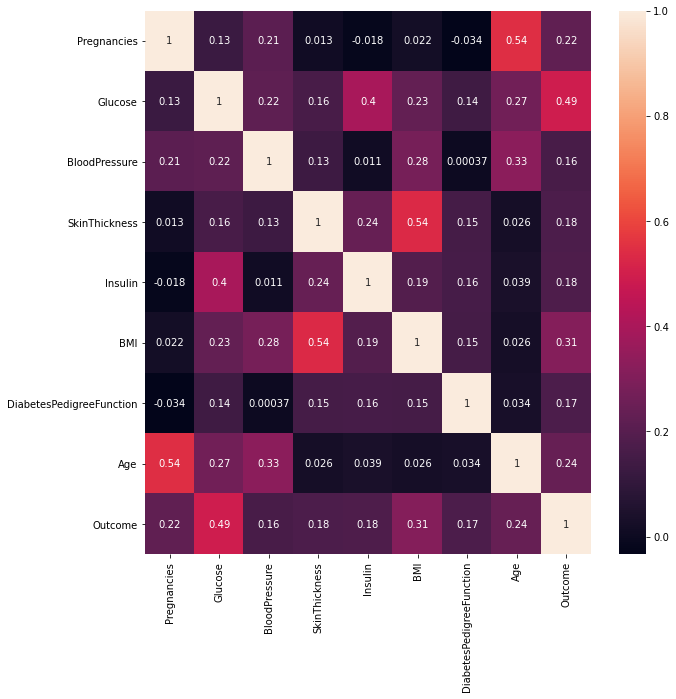

In [9]:
corr=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True);

* from the above figure the feature are not highly correlated to one another thus no feature need to be dropped

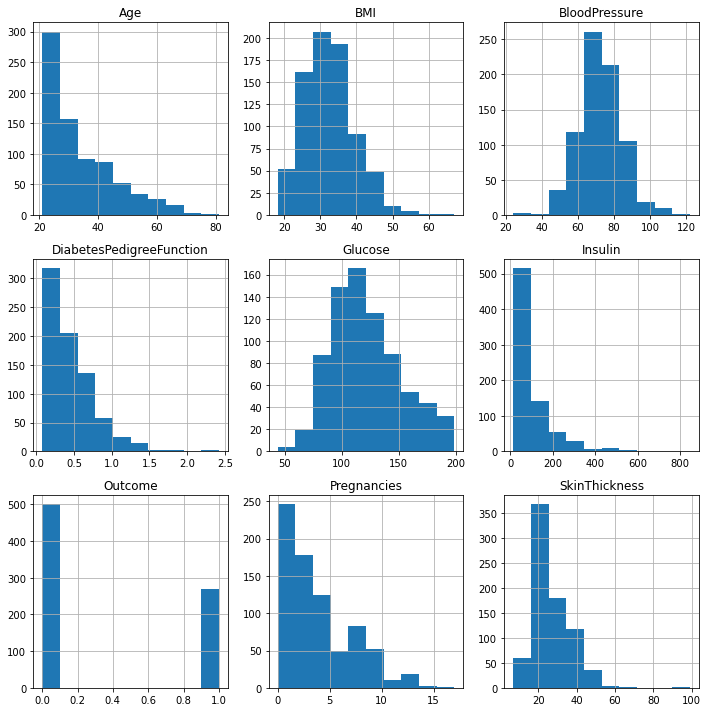

In [10]:
col=data.columns
data[col].hist(figsize=(10,10),layout=(3,3))
plt.tight_layout()

* most of the features are right skewed and glucose and blood pressures approches normal distribution
* from the above graph it seems that there is not much of a outliers

In [11]:
feature_cols=data.columns[:-1]

In [12]:

X_train,X_test,y_train,y_test=train_test_split(data[feature_cols],data['Outcome'],test_size=0.3,random_state=42)
X_train.shape,y_train.shape

((537, 8), (537,))

In [13]:
y_train.value_counts(normalize=True),y_test.value_counts(normalize=True)

(0    0.649907
 1    0.350093
 Name: Outcome, dtype: float64,
 0    0.65368
 1    0.34632
 Name: Outcome, dtype: float64)

In [14]:
ss_scaler=StandardScaler()
X_train_scaler=ss_scaler.fit_transform(X_train)
X_test_scaler=ss_scaler.transform(X_test)

###  Performing Machine Learning Algorithm

I have employed a couple of different machine learning algorithms to classify the dataset whether diabetic or not. I am gonna tune the parameter using GridserachCV to find the best possible parameter.

#### confusion matrix Function

In [15]:
def con_mat(y_act,y_pred,name):
    cm=confusion_matrix(y_act, y_pred, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Diabetic","Non-Diabetic"]],
                  columns = [i for i in ["Predict Diabetic","Predict Non-Diabetic"]])
    plt.figure(figsize = (6,6))
    plt.title("Confusion Matrix"+name)
    sns.heatmap(df_cm, annot=True ,fmt='g')
    precision, recall, fscore, _ = score(y_act, y_pred, average='weighted')
    
    print('model_precision',precision)
    print('model_recall',recall)
    print('model_fscore',fscore)

#### function for employing the machine learning algorithm 

In [16]:
def model_test(model,paramgrid):
    if paramgrid:
        model=GridSearchCV(model,paramgrid,cv=4)
        model.fit(X_train_scaler,y_train)
        print('best_fit_model:',model.best_params_)
    else:
        model.fit(X_train_scaler,y_train)
    y_pred=model.predict(X_test_scaler)
    
    print('Training score(i.e training accuracy) :',model.score(X_train_scaler,y_train))
    print('Testing score(i.e test accuracy) :',model.score(X_test_scaler,y_test))
    
    probas=model.predict_proba(X_test_scaler)
    
    fpr,tpr,_=roc_curve(y_test,probas[:,1])
    print('Area under the roc curve(i.e AUC) is:',auc(fpr,tpr))
    return y_pred

#### Logistic Regression model

Training score(i.e training accuracy) : 0.7877094972067039
Testing score(i.e test accuracy) : 0.7445887445887446
Area under the roc curve(i.e AUC) is: 0.7977649006622517
model_precision 0.7412365412365413
model_recall 0.7445887445887446
model_fscore 0.7425491044278476


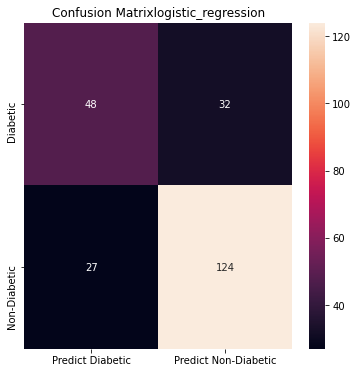

In [17]:
from sklearn.linear_model import LogisticRegression
name='logistic_regression'
lr=LogisticRegression(solver='liblinear')
y_pred=model_test(lr,paramgrid={})

con_mat(y_test,y_pred,name)

#### Logistic Regression with penalty l1 and l2

best_fit_model: {'C': 0.2111111111111111, 'penalty': 'l2'}
Training score(i.e training accuracy) : 0.7839851024208566
Testing score(i.e test accuracy) : 0.7402597402597403
Area under the roc curve(i.e AUC) is: 0.7984271523178808
model_precision 0.7362422394269529
model_recall 0.7402597402597403
model_fscore 0.7377298026648677


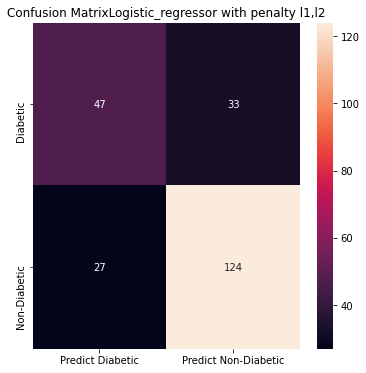

In [18]:
Model_LogReg= LogisticRegression(solver="liblinear")

name='Logistic_regressor with penalty l1,l2'
Params_ =  {'penalty': ['l1','l2'], 'C': np.linspace(0.1,1.1,10)}
y_pred= model_test(Model_LogReg,Params_)

con_mat(y_test,y_pred,name)

#### Support Vector machine Classifier

best_fit_model: {'C': 0.43333333333333335, 'kernel': 'rbf'}
Training score(i.e training accuracy) : 0.8175046554934823
Testing score(i.e test accuracy) : 0.7619047619047619
Area under the roc curve(i.e AUC) is: 0.8075331125827815
model_precision 0.7570757880617035
model_recall 0.7619047619047619
model_fscore 0.7582543163983082


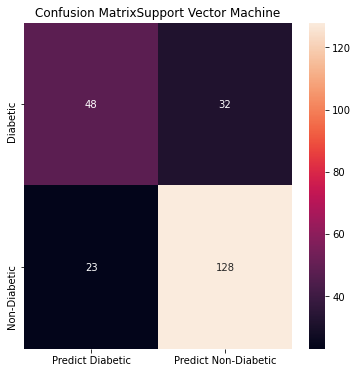

In [19]:
Mdl = SVC(probability=True)

name = "Support Vector Machine"
Param_grid_SVC =  {'C': np.linspace(0.1,1.1,10), 'kernel': ['poly','rbf',]}

y_pred = model_test(Mdl,Param_grid_SVC)
con_mat(y_test,y_pred,name)

#### K Neighbours Classifier Model

best_fit_model: {'metric': 'manhattan', 'n_neighbors': 7}
Training score(i.e training accuracy) : 0.8305400372439479
Testing score(i.e test accuracy) : 0.7012987012987013
Area under the roc curve(i.e AUC) is: 0.7590231788079469
model_precision 0.6918491955805389
model_recall 0.7012987012987013
model_fscore 0.6942544983361311


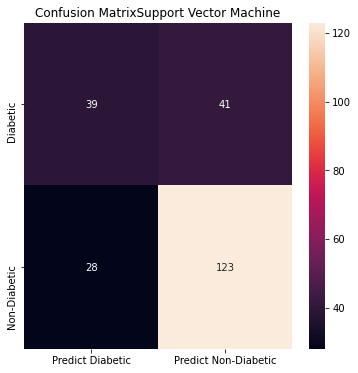

In [20]:
Mdl = KNeighborsClassifier()

mname = "k-Nearest Neighbours"
Param_grid_kNeigh =  {'n_neighbors': list(np.arange(3,8)), 'metric': ['manhattan','chebyshev']}

y_pred = model_test(Mdl,Param_grid_kNeigh)
con_mat(y_test,y_pred,name)

# Conclusion

* The dataset has been trained on the various models. The area under the curve (AUC) is used for comparing the model.
* Support Vector Machine outperforms other models not only in AUC but also in terms of fscore, precision, and recall also SVM has better testing accuracy than other models.